In [4]:
print("24BAD099 - Rithish A - ML Experiment 3 - Scenario 1")

24BAD099 - Rithish A - ML Experiment 3 - Scenario 1


   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
Done
Encoded parental education levels:
0    1
1    4
2    3
Name: parent_edu_level, dtype: int64
Encoded test preparation course:
0    1
1    0
2    1
Name: test_prep, dtype: int64
0    1
1    2
2    1
3    1
4    5
5    3
6    1
7    2
8    1
9    6
Name: study_hours, dtype: int32

0    82.272994
1    95.817855
2    63.993937
3    67.221881
4    82.971716
5    66.141665
6    56.420726
7    93.818549
8    51.781645
9    62.409659
Name: attendance, dt

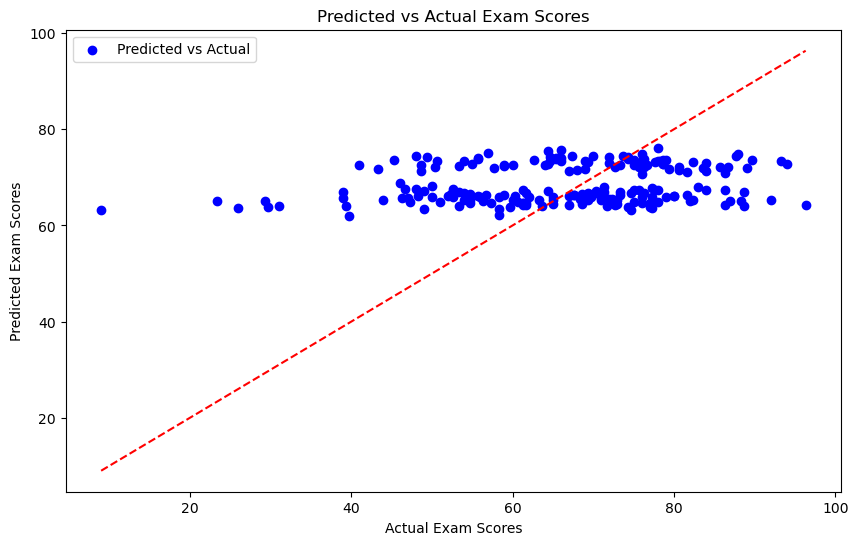

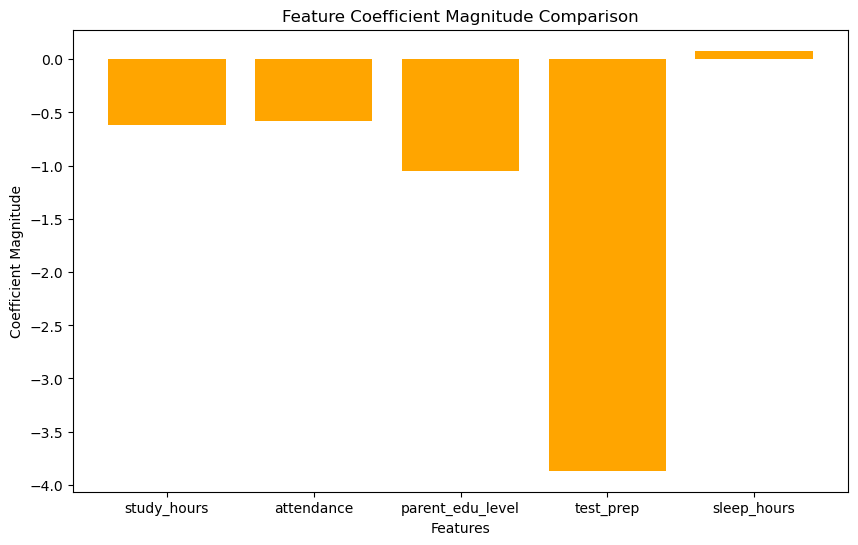

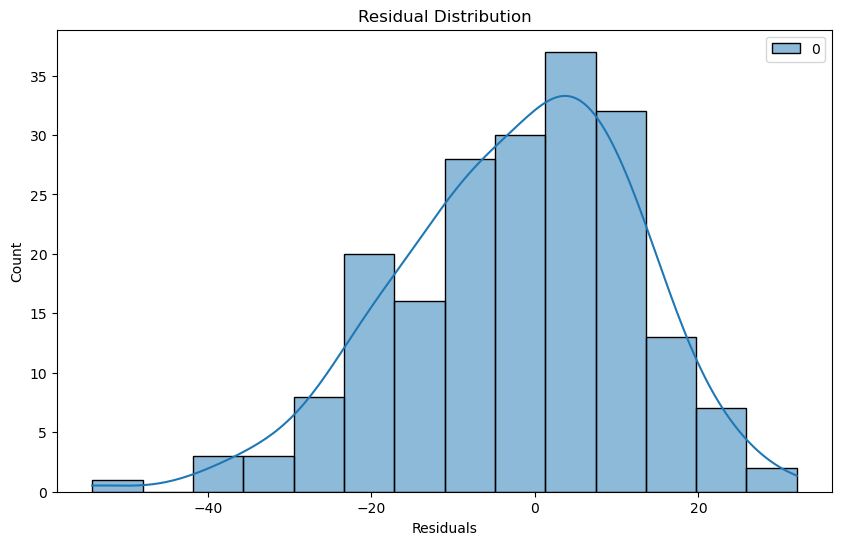


Done


In [ ]:
#24BAD099 - Rithish A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Checking the first few rows of the dataset
print(df.head(3))

# Initializing the target variable (Final Exam Score)
df["final_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3

print("Done")
   
# Encoding categorical features using LabelEncoder
encoder = LabelEncoder()
df['parent_edu_level'] = encoder.fit_transform(df["parental level of education"])
df['test_prep'] = encoder.fit_transform(df['test preparation course'])

# Checking the first few encoded values
print("Encoded parental education levels:")
print(df['parent_edu_level'].head(3))

print("Encoded test preparation course:")
print(df['test_prep'].head(3))

n = len(df)
df['study_hours'] = np.random.randint(1, 11, size=n)
df['attendance'] = np.random.uniform(50, 100, size=n)
df['sleep_hours'] = np.random.uniform(4, 10, size=n)

print(df['study_hours'].head(10))
print()
print(df['attendance'].head(10))
print()
print(df['sleep_hours'].head(10))
print()

features = ['study_hours', 'attendance', 'parent_edu_level', 'test_prep', 'sleep_hours']
X = df[features]
y = df["final_score"]  

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("Done")

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imputed, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Done")

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print("Regression Coefficients:")
print(coefficients)

from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print(f"Selected Features by RFE: {X.columns[rfe.support_]}")

from sklearn.linear_model import Ridge, Lasso

ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse}")

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse}")

print()
print("Done")


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual Exam Scores')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(features, model.coef_.flatten(), color='orange')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Coefficient Magnitude Comparison')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()


print()
print("Done")




 